# Non Linear Regression

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2019-09-11 16:08:56 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### plotting the data

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


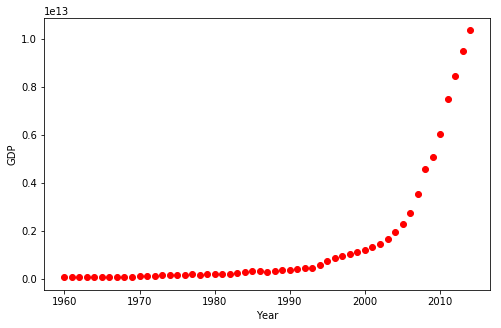

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
print(x_data)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing the model

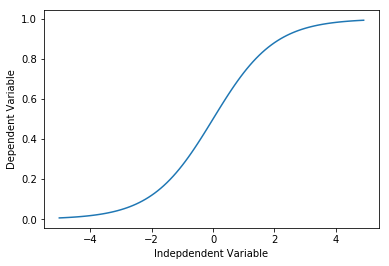

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building the model

In [5]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

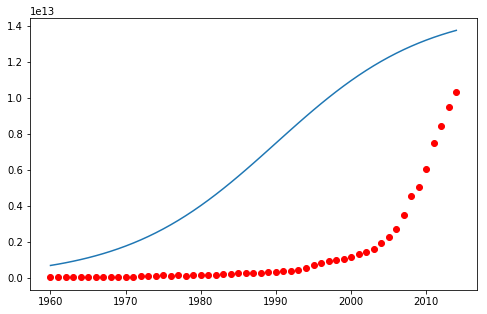

In [6]:
#Sample
beta_1 = 0.10
beta_2 = 1990.0
plt.figure(figsize=(8,5))

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [7]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [8]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print(pcov)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

[690.45301712   0.99720713]
[[ 1.52273887e+03 -2.88115957e-04]
 [-2.88115957e-04  7.25956452e-09]]
 beta_1 = 690.453017, beta_2 = 0.997207


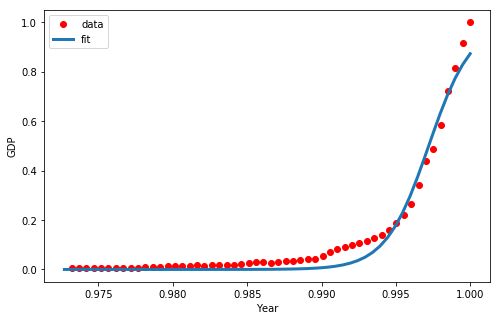

In [10]:
#Plot resulting regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

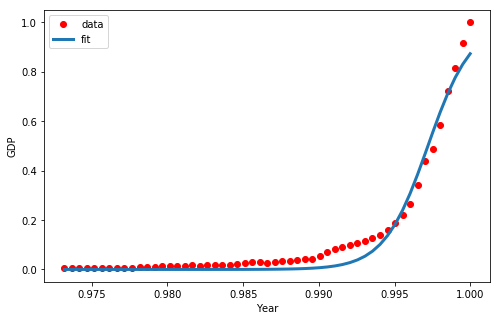

[0.97270471 0.97321018 0.97371565 0.97422112 0.97472659 0.97523206
 0.97573752 0.97624299 0.97674846 0.97725393 0.9777594  0.97826487
 0.97877033 0.9792758  0.97978127 0.98028674 0.98079221 0.98129767
 0.98180314 0.98230861 0.98281408 0.98331955 0.98382502 0.98433048
 0.98483595 0.98534142 0.98584689 0.98635236 0.98685783 0.98736329
 0.98786876 0.98837423 0.9888797  0.98938517 0.98989064 0.9903961
 0.99090157 0.99140704 0.99191251 0.99241798 0.99292344 0.99342891
 0.99393438 0.99443985 0.99494532 0.99545079 0.99595625 0.99646172
 0.99696719 0.99747266 0.99797813 0.9984836  0.99898906 0.99949453
 1.        ]
[0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.9900

In [11]:

plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(xdata,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
print(x)
print(xdata)

### Check accuracy with test and train data

[752.7982979    0.99719803]


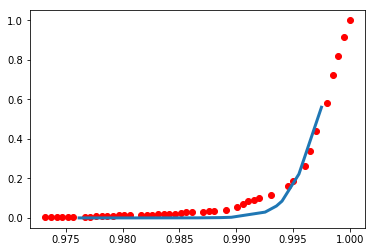

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.92


In [13]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print(popt)
# predict using test set
y_hat = sigmoid(test_x, *popt)
plt.plot(train_x, train_y,'ro')
plt.plot(test_x, y_hat,linewidth=3.0)
plt.show()
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

